# Case Study 4: Predicting Critical Temperature
Billy Nayden and Quynh Chau

Feb 1, 2021

## 1. Introduction
The purpose of this case study is to identify predictive features for critical temperature using physical features and chemical features of compounds. Linear regression will be used to predict critical temperature, and the model with the highest accuracy and lowest mean absolute error (MAE) will be chosen as the best predictive model.

## 2. Methods

The first step we took in this case study is to investigate the physical feature data set. The data set contains 21,263 observations and 81 dimensions. We separated the data set into our target variable (`critical_temp`) and our 80 potential parameters.

Next, we investigated any potential outliers in our `critical_temp` target variable. We found just one outlier and removed it from our data set. 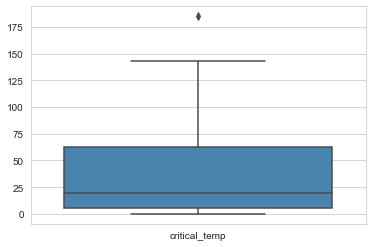

We then used `sklearn`'s `StandardScaler` to scale each potentialy parameter, thus making it easier to establish feature importances. The data contains no other missing or "dirty" data so we are to proceed to model development.

We split the data using an 80/20 train/test split, and used the following modeling methods to check predictions:

1. Linear regression using `sklearn`'s `LinearRegression` function on the physical feature data.
2. Linear regression using `sklearn`'s `LinearRegression` function on the physical feature data with k-fold cross validation at k=8.
3. Linear regression using `sklearn`'s `LinearRegression` function on the 10 most important features from our first model.

Next, we turned our attention to the chemical feature data set. The data contains a "Bag of Words" style breakdown of each chemical compound, with the number of molecules for each element contained in a particular chemical. There wer no outliers, no missing data, and no "dirty" data in this set, allowing us to proceed to model development.

We split the data using an 80/20 train/test split, and used the following modeling methods to check predictions:

4. Linear regression using `sklearn`'s `LinearRegression` function on the chemical feature data with k-fold cross validation at k=8.
5. Linear regression using `sklearn`'s `LinearRegression` function on a combined data set of phycical and chemical feature data.

## 3. Results

For the following charts, we will organize our models from left to right in the order specified in the **Methods** section. Thus, the linear regression on the physical feature data will be the leftmost model (`Model 1`), while the combined physical and chemical data linear regression model will be the rightmost model (`Model 5`). Below, `Table 1` shows each model, and how they rank for the two evaluation metrics we will use: MAE and Accuracy.

In [2]:
#Summarizing Results in a table

import pandas as pd
data = {'Model':['TTS- Physical Properties Features','kFold- Physical Features All','10-Best Physical Features',
                'LassoCV- Chemical Features', 'LassoCV - Physical & Chemical Features'],
        'MAE':[13.33, 13.51, 16.72, 16.01,16.97], 
        'Accuracy':[73.80, 73.03, 59.50, 59.97,59.72]} 
  
# Create DataFrame 
df_results_sum = pd.DataFrame(data) 
  
# Print the output. 
df_results_sum

,Model,MAE,Accuracy
0,TTS- Physical Properties Features,13.33,73.80
1,kFold- Physical Features All,13.51,73.03
2,10-Best Physical Features,16.72,59.50
3,LassoCV- Chemical Features,16.01,59.97
4,LassoCV - Physical & Chemical Features,16.97,59.72


First, we will look for the model that minimizes the MAE of our predictions. The bar chart below provides a good visual to evaluate this metric. 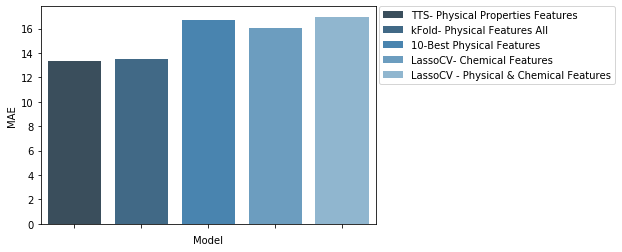

It is clear from the above chart that `Model 1` minimizes our MAE.

Second, we will look for the model that maximizes the accuracy of our predictions, The bar chart below provides a good visual to evaluate this metric. 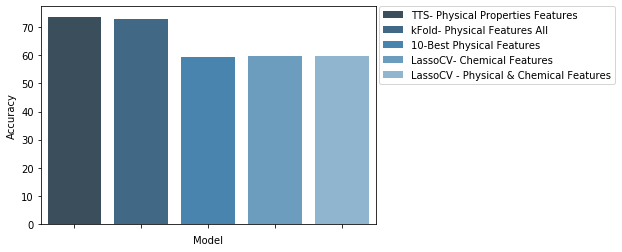

It is clear from the above chart that `Model 1` maximizes our accuracy.

Finally, we will look at the feature importance in `Model 1`. `Table 1` shows the top 10 most important features for the model, based upon their `fs_score`.

In [53]:
featureScores.nlargest(10,['fs_score'])

,Feature_Name,fs_score
70,wtd_std_ThermalConductivity,18497.493849
67,range_ThermalConductivity,15325.879248
69,std_ThermalConductivity,12768.058253
27,range_atomic_radius,12766.364393
72,wtd_mean_Valence,11336.088110
6,wtd_entropy_atomic_mass,11065.086672
74,wtd_gmean_Valence,10387.133755
26,wtd_entropy_atomic_radius,9790.200726
71,mean_Valence,9673.226124
17,range_fie,9622.285538


Visually, we can see what this table looks like in the bar chart below. 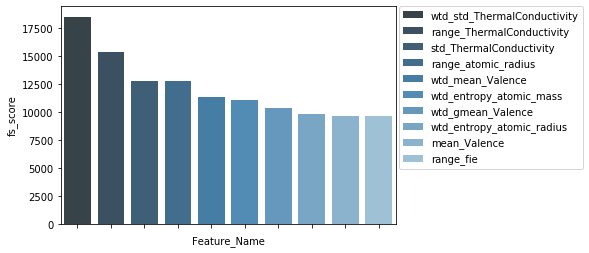

In `Model 1` the parameters `wtd_std_ThermalConductivity` and `range_ThermalConductivity` are the most imporant features, which is clear from both the bar chart and table above.

## 4. Conclusions

Our results showed that physical properties features performed better than chemical properties features in predicting critical temperature.  Although there were some physical features that were highly correlated with critical temperature identified using f_regression feature selection, they didn't have the best predictive performance as measured by mean absolute error and accuracy.  Models that predict critical temperature using all physical features yielded the best performance for both cross validation methods.

Based on our evaluation criteria of MAE and Accuracy, we believe `Model 1` to be our best predictive model for critical temperature. Furthermore, we have listed and visualized our most important features in the model above.

# Appendix: Python Code

In [4]:
# Reading and prepping files for exploratory data analysis
import pandas as pd
df_train = pd.read_csv('train.csv')
df_unique = pd.read_csv('unique_m.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

# EDA for Physical Properties Data Set

In [5]:
#Check for missing data - all missing data will be omitted
df_train.isnull().sum().sum()


0

In [6]:
df_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [7]:
#check for outliers - 
import numpy as np
df_outlier = pd.DataFrame(df_train, columns = ['critical_temp'])
df_outlier

,critical_temp
0,29.00
1,26.00
2,19.00
3,22.00
4,23.00
...,...
21258,2.44
21259,122.10
21260,1.98
21261,1.84


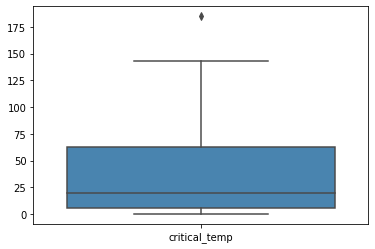

In [8]:
# Boxplot of Critical Temp to visually check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_outlier, palette="Blues_d")

In [9]:
#check for outliers in critical_temp
from numpy import percentile

# calculate interquartile range
q25, q75 = df_outlier['critical_temp'].quantile(.25), df_outlier['critical_temp'].quantile(.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=5.365, 75th=63.000, IQR=57.635


In [10]:
# calculate the outlier cutoff (lower bound) for 25th quantile
cut_off = iqr * 1.5
lower =q25 - cut_off

df_outlier[df_outlier.critical_temp < lower]


,critical_temp


In [11]:
# calculate the outlier cutoff for 75 quantiles
cut_off = iqr * 1.5
upper = q75 + cut_off

df_outlier[df_outlier.critical_temp >upper]


,critical_temp
20573,185.0


In [12]:
# identify outliers
outliers = df_outlier[df_outlier.critical_temp < lower] & df_outlier[df_outlier.critical_temp > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1


In [13]:
# remove outliers from df_train dataset (1 record deleted using upper threshold; no records below min threshold)
df_noOutlier = df_train[(df_train.critical_temp < upper) & (df_train.critical_temp > lower)]
df_noOutlier.shape

(21262, 82)

In [14]:
# Splitting the data into indepedent and dependent variables; dependent var = critical_temp
X = df_noOutlier.drop(['critical_temp'], axis = 1)
y = df_noOutlier['critical_temp']


In [15]:
# Feature Scaling using Standardization
from sklearn.preprocessing import StandardScaler 
  
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale x data (all independent features)
scaler.fit(X)
x = scaler.transform(X)

# Feature Selections and Linear Regression Modeling for Physical Properties

In [16]:
# Feature Selection Using feature_selection SelectKBest and f_regression for Physical Properties
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

#Feature Selection
def select_features(x_train,y_train, x_test):
    fs = SelectKBest(score_func = f_regression, k='all')
    fs.fit(x_train,y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test) 
    return x_train_fs, x_test_fs, fs

#Split data into train and test sets, 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =2)

x_train_fs, x_test_fs, fs = select_features(x_train,y_train, x_test)

for i in range (len(fs.scores_)):
    print('Feature %d:%f' % (i,fs.scores_[i]))

dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Feature_Name', 'fs_score']
featureScores.nlargest(10,['fs_score'])

Feature 0:9588.078409
Feature 1:217.789333
Feature 2:1827.191197
Feature 3:946.474215
Feature 4:2685.617989
Feature 5:7136.513623
Feature 6:11065.086672
Feature 7:5455.376010
Feature 8:2221.729557
Feature 9:2855.018694
Feature 10:2522.305024
Feature 11:169.121843
Feature 12:3166.964254
Feature 13:14.024946
Feature 14:2240.409707
Feature 15:8107.684716
Feature 16:3097.880708
Feature 17:9622.285538
Feature 18:1649.051458
Feature 19:7080.245034
Feature 20:8617.886131
Feature 21:204.268564
Feature 22:1623.809360
Feature 23:347.023935
Feature 24:3307.149384
Feature 25:7733.496216
Feature 26:9790.200726
Feature 27:12766.364393
Feature 28:2319.795187
Feature 29:7841.287153
Feature 30:9513.939349
Feature 31:2690.191641
Feature 32:3940.844058
Feature 33:7078.430217
Feature 34:6977.639703
Feature 35:4514.565542
Feature 36:3301.077489
Feature 37:1212.790350
Feature 38:1527.136694
Feature 39:216.458473
Feature 40:749.663889
Feature 41:664.790903
Feature 42:208.772676
Feature 43:2883.738704
Feature

,Feature_Name,fs_score
70,wtd_std_ThermalConductivity,18497.493849
67,range_ThermalConductivity,15325.879248
69,std_ThermalConductivity,12768.058253
27,range_atomic_radius,12766.364393
72,wtd_mean_Valence,11336.088110
6,wtd_entropy_atomic_mass,11065.086672
74,wtd_gmean_Valence,10387.133755
26,wtd_entropy_atomic_radius,9790.200726
71,mean_Valence,9673.226124
17,range_fie,9622.285538


In [17]:
featureScores.nlargest(10,['fs_score'])
top10FS = featureScores.nlargest(10,['fs_score'])

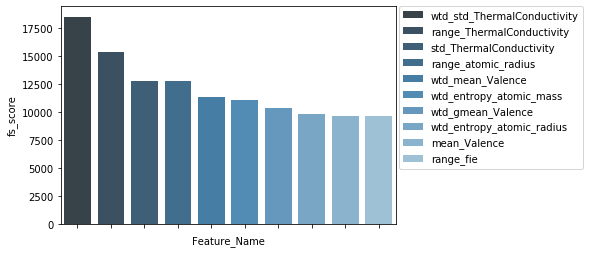

In [32]:
bar = sns.barplot(x="Feature_Name", y="fs_score", hue="Feature_Name", dodge=False, data=top10FS, palette="Blues_d")
bar.set(xticklabels=[])
bar.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [19]:
#Linear Regression using all 80 features
Model = LinearRegression()
Model.fit(x_train,y_train)
Predictions = Model.predict(x_test)
mae = mean_absolute_error(Predictions, y_test)
print('MAE:%.3f' % mae)
print("Accuracy score:",Model.score(x_test,y_test))

MAE:13.134
Accuracy score: 0.7447073839150875


In [20]:
# x is the standardized feature sets of 80 features, y is the dependent var, critical_temp
x.shape, y.shape

((21262, 81), (21262,))

In [33]:
# Cross Validation using K Fold and all 80 Features of Physical Properties
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

#Get k-fold split
kf = KFold(n_splits=8, shuffle = True, random_state =2)

for train_index, test_index in kf.split(x, y): 
    x1_train, x1_test = x[train_index], x[test_index]
    y1_train, y1_test = y[train_index], y[test_index]
    
Model1 = LinearRegression()
Model1.fit(x1_train,y1_train)
scores = cross_val_score(Model1, x, y, scoring='neg_mean_absolute_error',
                         cv=kf, n_jobs=-1)

#view mean absolute error
print("Average MAE:", mean(absolute(scores)))
print("Average Accuracy:", Model1.score(x,y))

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [34]:
# Cross Validation using LassoCV for Physical Properties = all features
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

reg = LassoCV(cv=8, random_state=2).fit(x,y)
reg.predict(x)
reg.score(x,y)
print("Accuracy_reg",reg.score(x,y))
print("MAE_reg", mean_absolute_error(y,reg.predict(x)))

C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13715.061115996912, tolerance: 2036.3926414210205
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17449.79709449783, tolerance: 2036.3926414210205
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19933.8860100843, tolerance: 2036.3926414210205
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_

C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33524.89955103956, tolerance: 2273.919211490676
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7347.422935188748, tolerance: 2240.3067830770456
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14666.221679897979, tolerance: 2240.3067830770456
  tol, rng, random, positive)
C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_

Accuracy_reg 0.730288302084537
MAE_reg 13.51241805908389


C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622580.184373288, tolerance: 2492.533391936747
  positive)


In [35]:
# Model Building with 10 Best Physical Features

new = df_train[['wtd_std_ThermalConductivity','range_ThermalConductivity','std_ThermalConductivity',
                         'range_atomic_radius','wtd_mean_Valence','wtd_entropy_atomic_mass','wtd_gmean_Valence',
                          'wtd_entropy_atomic_radius','mean_Valence','range_fie','critical_temp']].copy()
new = pd.DataFrame([df_train.wtd_std_ThermalConductivity,df_train.range_ThermalConductivity,df_train.std_ThermalConductivity,
                         df_train.range_atomic_radius,df_train.wtd_mean_Valence,df_train.wtd_entropy_atomic_mass,df_train.wtd_gmean_Valence,
                          df_train.wtd_entropy_atomic_radius,df_train.mean_Valence,df_train.range_fie,df_train.critical_temp]).transpose()

new.head(5)

,wtd_std_ThermalConductivity,range_ThermalConductivity,std_ThermalConductivity,range_atomic_radius,wtd_mean_Valence,wtd_entropy_atomic_mass,wtd_gmean_Valence,wtd_entropy_atomic_radius,mean_Valence,range_fie,critical_temp
0,138.517163,399.97342,168.854244,205.0,2.257143,1.062396,2.219783,1.207040,2.25,810.6,29.0
1,139.630922,429.97342,198.554600,205.0,2.257143,1.057755,2.210679,1.204115,2.00,810.6,26.0
2,138.540613,399.97342,168.854244,205.0,2.271429,0.975980,2.232679,1.132547,2.25,810.6,19.0
3,138.528893,399.97342,168.854244,205.0,2.264286,1.022291,2.226222,1.173033,2.25,810.6,22.0
4,138.493671,399.97342,168.854244,205.0,2.242857,1.129224,2.206963,1.261194,2.25,810.6,23.0


In [36]:
# Splitting the data into indepedent and dependent variables; dependent var = critical_temp for 10 best scoring features
X_pp10 = new.drop(['critical_temp'], axis = 1)
y_pp10 = new['critical_temp']


In [37]:
# Feature Scaling using Standardization for 10 Best Features (physical features)
from sklearn.preprocessing import StandardScaler 
  
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale x data (all independent features)
scaler.fit(X_pp10)
x_pp10 = scaler.transform(X_pp10)

In [38]:
# Cross Validation using K Fold and 10 Best Features of Physical Properties (pp)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

#Get k-fold split
kf = KFold(n_splits=8, shuffle = True, random_state =2)

for train_index, test_index in kf.split(x, y): 
    x_pp10_train, x_pp10_test = x_pp10[train_index], x_pp10[test_index]
    y_pp10_train, y_pp10_test = y_pp10[train_index], y_pp10[test_index]
    
Model2 = LinearRegression()
Model2.fit(x_pp10_train,y_pp10_train)
scores = cross_val_score(Model2, x_pp10, y_pp10, scoring='neg_mean_absolute_error',
                         cv=kf, n_jobs=-1)

#view mean absolute error
print("Average MAE_pp10:", mean(absolute(scores)))
print("Average Accuracy_pp10:", Model2.score(x_pp10,y_pp10))

Average MAE_pp10: 16.721381071582627
Average Accuracy_pp10: 0.5949634603359286


# Linear Regression using KFold for Chemical Properties

In [39]:
#Check for missing data - all missing data will be omitted
df_unique.isnull().sum().sum()


0

In [40]:
df_unique.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [41]:
# Splitting the data into indepedent and dependent variables; dependent var = critical_temp
x_cp = df_unique.drop(['critical_temp','material'], axis = 1)
y_cp = df_unique['critical_temp']


In [42]:
# Cross Validation using LassoCV for Chemical Properties 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

reg = LassoCV(cv=8, random_state=2).fit(x_cp,y_cp)
reg.predict(x_cp)
reg.score(x_cp,y_cp)
print("Accuracy_cp",reg.score(x_cp,y_cp))
print("MAE_cp", mean_absolute_error(y_cp,reg.predict(x_cp)))

Accuracy_cp 0.5997053114586011
MAE_cp 16.06150631372248


# Combining Physical Properties and Chemical Properties Data Features

In [43]:
# Combine data sets: physical properties (train dataset) and chemical properties (unique data set), dropping critical_temp from the unique dataset
df_notemp = df_unique.drop('critical_temp', axis = 1)

# Combine physical and chemical properties data sets with physical features standardized
df_ppcp = pd.concat([df_train,df_notemp], axis = 1)


In [44]:
# splitting the combined data set
X_ppcp = df_ppcp.drop(['critical_temp', 'material'], axis =1)
Y_ppcp = df_ppcp['critical_temp']

In [45]:
# Cross Validation using LassoCV for combined data set of physical and chemical properties
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

reg1 = LassoCV(cv=8, random_state=2).fit(X_ppcp,Y_ppcp)
reg1.predict(X_ppcp)
reg1.score(X_ppcp,Y_ppcp)
print("Accuracy_ppcp",reg1.score(X_ppcp,Y_ppcp))
print("MAE_ppcp", mean_absolute_error(Y_ppcp,reg1.predict(X_ppcp)))

Accuracy_ppcp 0.5971820191273802
MAE_ppcp 16.974408353720083


In [46]:
#Summarizing Results in a table

import pandas as pd
data = {'Model':['TTS- Physical Properties Features','kFold- Physical Features All','10-Best Physical Features',
                'LassoCV- Chemical Features', 'LassoCV - Physical & Chemical Features'],
        'MAE':[13.33, 13.51, 16.72, 16.01,16.97], 
        'Accuracy':[73.80, 73.03, 59.50, 59.97,59.72]} 
  
# Create DataFrame 
df_results_sum = pd.DataFrame(data) 
  
# Print the output. 
df_results_sum

,Model,MAE,Accuracy
0,TTS- Physical Properties Features,13.33,73.80
1,kFold- Physical Features All,13.51,73.03
2,10-Best Physical Features,16.72,59.50
3,LassoCV- Chemical Features,16.01,59.97
4,LassoCV - Physical & Chemical Features,16.97,59.72


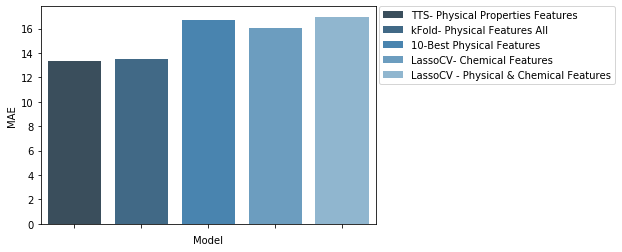

In [51]:
MAEbar = sns.barplot(x="Model", y="MAE", data=df_results_sum, hue="Model",dodge=False, palette="Blues_d")
MAEbar.set(xticklabels=[])
MAEbar.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

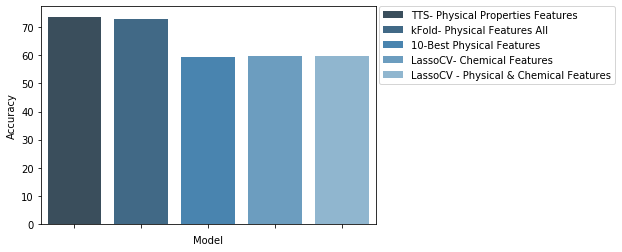

In [52]:
Accbar = sns.barplot(x="Model", y="Accuracy", data=df_results_sum, hue="Model",dodge=False, palette="Blues_d")
Accbar.set(xticklabels=[])
Accbar.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)